In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from utils import *
from collections import namedtuple

import torch as tr
import gym

%load_ext autoreload
%autoreload 2

In [2]:
def experiment(nseeds,neps,kw={}):
    """
    interactrion logic
    a < agent(s,h)
    s',r  < env (a)

    """
    metric = np.zeros((nseeds,neps))
    data = np.zeros((2,nseeds,neps))
    agentL = []
    # loop over seeds
    for s in range(nseeds):
        np.random.seed(s)
        tr.manual_seed(s)
        # setup
        agent = ACAgent(**kw)
        task = Task(task_name='CartPole-v1',max_ep_len=50)
        for e in range(neps):
            traj = task.play_ep(pi=agent.act)
            expD = unpack_expL(traj)
            metric[s,e] = np.sum(expD['reward'])
            agent.update(expD)
            epdata = agent.eval(expD)
            data[0,s,e] = epdata['entropy']
            data[1,s,e] = epdata['delta']
        agentL.append(agent)
    return metric,data,agentL

In [3]:
ns,ne = 5,5002
metric,data,agents = experiment(ns,ne,kw={'TDupdate':True,'learnrate':0.001,'stsize':35})

In [4]:
w = 5
movavg = lambda X: np.mean([X[i:i+w] for i in range(len(X)-w)],1)

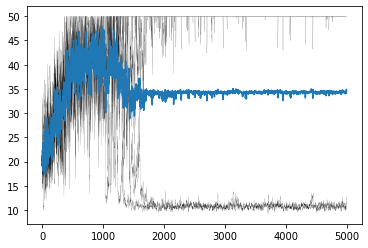

In [5]:
# for metric in [metric]:
M = metric.mean(0)
M = movavg(M)
plt.plot(M)
for m in metric:
    plt.plot(movavg(m),c='k',zorder=0,lw=0.1)

Text(0.5, 1.0, 'entropy of pi')

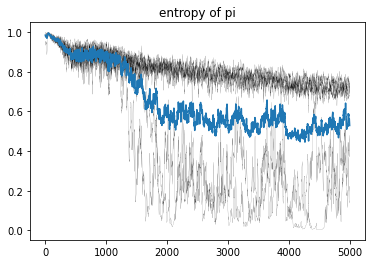

In [6]:
# for data in [ACdata,REdata]:
ent = data[0]
E = movavg(ent.mean(0))
ax = plt.gca()
ax.plot(E)
for ei in ent:
  ax.plot(movavg(ei),c='k',zorder=0,lw=.1)
ax.set_title('entropy of pi')

Text(0.5, 1.0, 'value estimate error')

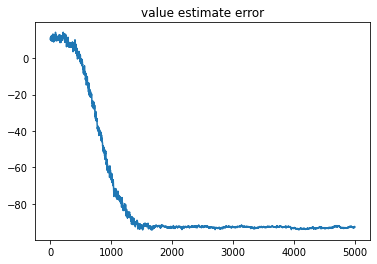

In [7]:
# for data in [ACdata,REdata]:
M = data[1].mean(0)
M = movavg(M)
plt.plot(M)
plt.title('value estimate error')

# save

In [8]:
for i in range(ns):
  fpath = 'experts/agent_%.2i-tasklen50-ne_%i-TD1'%(i,ne)
  tr.save(agents[i],fpath)
  print(fpath)

experts/agent_00-tasklen50-ne_5002-TD1
experts/agent_01-tasklen50-ne_5002-TD1
experts/agent_02-tasklen50-ne_5002-TD1
experts/agent_03-tasklen50-ne_5002-TD1
experts/agent_04-tasklen50-ne_5002-TD1
